On March 1st 2021, Mayor Lori Lightfoot lowered the threshold for speeding tickets from 10 mph over the limit to 6. This policy is primarily enforced by the 153 speed cameras set up around Chicago. 

My motivation for performing this analysis is 



In [2]:
#import packages
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import datetime
import sklearn as sk

### Data Load

In [3]:
crash = pd.read_csv('Traffic_Crashes_Crashes.csv')

In [4]:
violations = pd.read_csv('Speed_Camera_Violations.csv')

In [5]:
cameras = pd.read_csv('Speed_Camera_Locations.csv')

### Data Cleaning

In [7]:
#Formating camera address to be grouped by their respective Chicago city block
cameras['ADDRESS'] = [re.sub("\(Speed Camera\)","",addr).strip().upper() for addr in cameras['ADDRESS']]
cameras['STREET_NO'] = [re.findall("\d+",street_no)[0] for street_no in cameras['ADDRESS']]
cameras['BLOCK_NO'] = round(cameras['STREET_NO'].astype(int)/100)*100
cameras = cameras.astype({"BLOCK_NO":int})
cameras['FULL_ADDR'] = [re.sub(street_no,block_no,address) for street_no, block_no, address 
                        in zip(cameras['STREET_NO'],cameras['BLOCK_NO'].astype(str),cameras['ADDRESS'])]

In [10]:
#Remove crashes without reported streets
crash.dropna(subset=["STREET_NAME"],inplace=True)

#Formatting location of crash address to be grouped by their respective Chicago city block
crash['STREET_NO'] = crash['STREET_NO'].astype({"STREET_NO":int})
crash['BLOCK_NO'] = round(crash['STREET_NO']/100)*100
crash = crash.astype({"BLOCK_NO":int})
crash['FULL_ADDR'] = crash['BLOCK_NO'].astype(str) +" "+ crash['STREET_DIRECTION'] +" "+ crash['STREET_NAME'] 

#Format date to date format and adding a column to allow for date to be grouped by month
crash['CRASH_DATE'] = pd.to_datetime(crash['CRASH_DATE'],format="%m/%d/%Y %I:%M:%S %p").dt.date
crash['CRASH_DATE_TRUNC'] = crash['CRASH_DATE'].apply(lambda s: datetime.date(s.year, s.month, 1))

violations['VIOLATION DATE'] = pd.to_datetime(violations['VIOLATION DATE'],format="%m/%d/%Y").dt.date
violations['VIOLATION DATE TRUNC'] = violations['VIOLATION DATE'].apply(lambda s: datetime.date(s.year, s.month, 1))


In [12]:
#Dropping crashes that occurred prior to 9/1/17 because entire city did not start reporting on crashes until this date.
#datetime_str = '09/01/2017'
#datetime_object = datetime.datetime.strptime(datetime_str, '%m/%d/%Y')

crash = crash[(crash['CRASH_DATE_TRUNC']>datetime.date(2017,9,1))&(crash['CRASH_DATE_TRUNC']<datetime.date(2023,1,1))]
violations = violations[(violations['VIOLATION DATE']>datetime.date(2017,9,1))&(violations['VIOLATION DATE']<datetime.date(2023,1,1))]

In [14]:
#Group by month truncated date and sum number of occurences
crash_group = crash[['CRASH_DATE_TRUNC','CRASH_RECORD_ID']].groupby(by='CRASH_DATE_TRUNC').count()
violation_group = violations[['VIOLATION DATE TRUNC','VIOLATIONS']].groupby(by='VIOLATION DATE TRUNC').sum()

In [16]:
#filter crash locations by speed camera block location plus adjacent streets.
cameras['BLOCK_NO_UP'] = cameras['BLOCK_NO'] +100
cameras['BLOCK_NO_DOWN'] = cameras['BLOCK_NO'] -100

In [17]:
cameras.loc[cameras[cameras['BLOCK_NO_DOWN']<0].index,'BLOCK_NO_DOWN'] = 0

In [18]:
cameras['FULL_ADDR_UP'] = [re.sub(street_no,block_no,address) for street_no, block_no, address 
                        in zip(cameras['STREET_NO'],cameras['BLOCK_NO_UP'].astype(str),cameras['ADDRESS'])]
cameras['FULL_ADDR_DOWN'] = [re.sub(street_no,block_no,address) for street_no, block_no, address 
                        in zip(cameras['STREET_NO'],cameras['BLOCK_NO_DOWN'].astype(str),cameras['ADDRESS'])]

In [27]:
camera_area = pd.concat([cameras['FULL_ADDR'],cameras['FULL_ADDR_UP'],cameras['FULL_ADDR_DOWN']]).unique()

In [85]:
test = crash.merge(cameras,on="FULL_ADDR",how="left")

In [86]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 577700 entries, 0 to 577699
Data columns (total 61 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   CRASH_RECORD_ID                577700 non-null  object 
 1   RD_NO                          577700 non-null  object 
 2   CRASH_DATE_EST_I               42543 non-null   object 
 3   CRASH_DATE                     577700 non-null  object 
 4   POSTED_SPEED_LIMIT             577700 non-null  int64  
 5   TRAFFIC_CONTROL_DEVICE         577700 non-null  object 
 6   DEVICE_CONDITION               577700 non-null  object 
 7   WEATHER_CONDITION              577700 non-null  object 
 8   LIGHTING_CONDITION             577700 non-null  object 
 9   FIRST_CRASH_TYPE               577700 non-null  object 
 10  TRAFFICWAY_TYPE                577700 non-null  object 
 11  LANE_CNT                       111254 non-null  float64
 12  ALIGNMENT                     

### Data Exploration

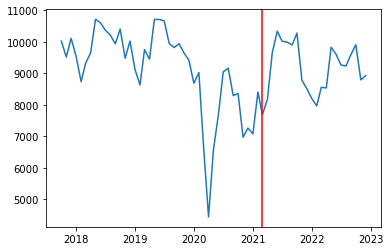

In [74]:
fig, ax = plt.subplots()
ax.plot(crash_group.index, crash_group['CRASH_RECORD_ID'])
plt.axvline(datetime.datetime(2021, 3, 1), color='r')

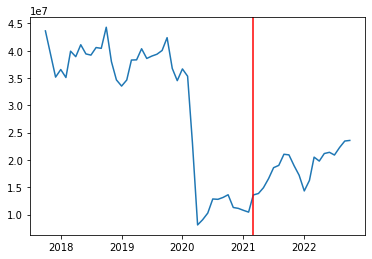

In [75]:
fig, ax = plt.subplots()
ax.plot(cta_group.index, cta_group['total_rides'])
plt.axvline(datetime.datetime(2021, 3, 1), color='r')

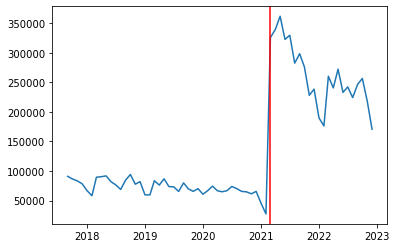

In [38]:
fig, ax = plt.subplots()
ax.plot(violation_group.index, violation_group['VIOLATIONS'])
plt.axvline(datetime.datetime(2021, 3, 1), color='r')

### Data Cleaning

In [28]:
#Filter crashes to only locations by speed camera


### Analysis

In [29]:
#Did adding a speed limit camera lower to the street also lower the number of crashes on the road?
#Did lowering speed limit threshold lower the number of crashes? How about the number of fatal crashes?
#Start with basic t-Test
#Try ARIMA 

### Conclusion